### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/fast-food-joint-nutrition-values-dataset/Nutrition_Value_Dataset.csv


### Dataset Reading

In [2]:
df = pd.read_csv('/kaggle/input/fast-food-joint-nutrition-values-dataset/Nutrition_Value_Dataset.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_') 
df.columns=df.columns.str.rstrip()
df

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN


In [3]:
df.shape

(530, 14)

In [4]:
df.columns

Index(['company', 'category', 'product', 'per_serve_size', 'energy_(kcal)',
       'carbohydrates_(g)', 'protein_(g)', 'fiber_(g)', 'sugar_(g)',
       'total_fat_(g)', 'saturated_fat_(g)', 'trans_fat_(g)',
       'cholesterol_(mg)', 'sodium_(mg)'],
      dtype='object')

In [5]:
df.head()

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67


In [6]:
df.tail()

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.9,24.5,35.3,5.76,10.4,12.6,4.8,0.19,308.70,NaN
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.2,51.3,26.7,5.16,3.6,13.9,4.3,0.17,713.07,NaN
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.5,17.3,19.2,16.92,10.6,31.3,14.1,0.56,541.49,NaN
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.6,34.2,9.3,5.40,3.9,16.5,4.5,0.18,564.30,NaN
529,Dominos,All Meals,CALZONE POCKETS - CHICKEN,248.0,582.9,101.0,18.6,5.04,12.2,11.6,4.2,0.17,1171.60,NaN


In [7]:
df.sample(5)

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
255,McDonalds,REGULAR MENU,3 piece Chicken Strips,87.0,246.65,4.02,15.26,3.00,0.44,18.57,17.12,0.09,45.15,715.83
45,Pizza Hut,All Meals,Chicken n Corn Delight (Medium),218g,444.90,58.79,21.70,2.68,0.00,13.66,5.34,0.15,52.42,1027.51
174,Burger King,All Meals,Fiery Rings 2Pcs,40,137.60,18.00,3.50,16.00,1.10,5.70,2.70,0.00,19.95,0.20
339,McDonalds,DESSERTS MENU,Chunky Chipotle American Burger Chicken,301.0,641.36,46.24,39.47,2.00,9.16,31.51,9.54,0.26,110.37,1906.27
19,Pizza Hut,All Meals,Chicken Pepperoni (Personal),154.5 g,439.17,50.41,14.85,4.74,3.62,19.79,7.79,0.22,112.45,948.58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            530 non-null    object 
 1   category           530 non-null    object 
 2   product            530 non-null    object 
 3   per_serve_size     530 non-null    object 
 4   energy_(kcal)      530 non-null    float64
 5   carbohydrates_(g)  530 non-null    float64
 6   protein_(g)        530 non-null    float64
 7   fiber_(g)          530 non-null    float64
 8   sugar_(g)          530 non-null    float64
 9   total_fat_(g)      530 non-null    float64
 10  saturated_fat_(g)  530 non-null    float64
 11  trans_fat_(g)      530 non-null    float64
 12  cholesterol_(mg)   530 non-null    float64
 13  sodium_(mg)        443 non-null    float64
dtypes: float64(10), object(4)
memory usage: 58.1+ KB


In [9]:
df.describe()

,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
count,530.000000,530.000000,530.000000,530.0000,530.000000,530.000000,530.000000,530.000000,530.000000,443.000000
mean,377.304470,39.442302,16.710340,inf,8.276226,13.228528,5.946302,0.279443,118.620434,422.431578
std,338.315722,21.196943,24.425784,NaN,12.186627,10.740934,4.844024,3.265604,502.865434,471.300077
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.6900,0.000000,5.000000,2.500000,0.030000,9.462500,1.450000
50%,329.645000,38.570000,11.445000,3.0000,3.200000,12.600000,5.240000,0.110000,30.085000,220.000000
75%,451.812500,54.120000,20.005000,5.9975,9.850000,18.360000,8.095000,0.207500,77.535000,754.975000
max,2880.000000,137.800000,203.000000,inf,64.220000,82.600000,33.000000,75.260000,9769.700000,2399.490000


### Data Cleaning

In [10]:
df.duplicated().sum()

0

Good to see that there is no duplicate value

In [11]:
df.isna().sum()

company               0
category              0
product               0
per_serve_size        0
energy_(kcal)         0
carbohydrates_(g)     0
protein_(g)           0
fiber_(g)             0
sugar_(g)             0
total_fat_(g)         0
saturated_fat_(g)     0
trans_fat_(g)         0
cholesterol_(mg)      0
sodium_(mg)          87
dtype: int64

In [12]:
median_sodium = df['sodium_(mg)'].median()
df['sodium_(mg)'].fillna(median_sodium, inplace=True)

In [13]:
df.isna().sum()

company              0
category             0
product              0
per_serve_size       0
energy_(kcal)        0
carbohydrates_(g)    0
protein_(g)          0
fiber_(g)            0
sugar_(g)            0
total_fat_(g)        0
saturated_fat_(g)    0
trans_fat_(g)        0
cholesterol_(mg)     0
sodium_(mg)          0
dtype: int64

In [14]:
df.describe()

,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
count,530.000000,530.000000,530.000000,530.0000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,377.304470,39.442302,16.710340,inf,8.276226,13.228528,5.946302,0.279443,118.620434,389.202243
std,338.315722,21.196943,24.425784,NaN,12.186627,10.740934,4.844024,3.265604,502.865434,437.294086
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.6900,0.000000,5.000000,2.500000,0.030000,9.462500,14.135000
50%,329.645000,38.570000,11.445000,3.0000,3.200000,12.600000,5.240000,0.110000,30.085000,220.000000
75%,451.812500,54.120000,20.005000,5.9975,9.850000,18.360000,8.095000,0.207500,77.535000,679.650000
max,2880.000000,137.800000,203.000000,inf,64.220000,82.600000,33.000000,75.260000,9769.700000,2399.490000


In [15]:
df['fiber_(g)'].value_counts().head(10)

0.0     60
1.0     53
2.0     52
3.0     46
9.0     11
7.0      9
inf      8
10.0     8
11.0     7
8.0      7
Name: fiber_(g), dtype: int64

We need to treat these 'inf' and 'NaN values in 'fiber_(g)' field

In [16]:
median_fiber = df['fiber_(g)'].median()

df['fiber_(g)'].replace([float('inf'), float('nan')], median_fiber, inplace=True)

In [17]:
df.describe()

,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,377.304470,39.442302,16.710340,4.662792,8.276226,13.228528,5.946302,0.279443,118.620434,389.202243
std,338.315722,21.196943,24.425784,5.660849,12.186627,10.740934,4.844024,3.265604,502.865434,437.294086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.690000,0.000000,5.000000,2.500000,0.030000,9.462500,14.135000
50%,329.645000,38.570000,11.445000,3.000000,3.200000,12.600000,5.240000,0.110000,30.085000,220.000000
75%,451.812500,54.120000,20.005000,5.702500,9.850000,18.360000,8.095000,0.207500,77.535000,679.650000
max,2880.000000,137.800000,203.000000,45.000000,64.220000,82.600000,33.000000,75.260000,9769.700000,2399.490000


##### Now data looks clean so let's start our analysis😊

### Exploring Fields

In [18]:
companies = pd.Series(df['company'].unique())
companies

0      Pizza Hut
1    Burger King
2      Starbucks
3      McDonalds
4            KFC
5        Dominos
dtype: object

In [19]:
df['company'].value_counts()

Pizza Hut      144
McDonalds      140
Dominos         87
KFC             72
Starbucks       46
Burger King     41
Name: company, dtype: int64

In [20]:
df['category'].unique()

array(['All Meals', 'Hot Breakfast', 'Cookies, Brownies & Bars',
       'Croissants, Danishes & Bagels',
       'Loaves, Coffee Cakes & Cake Pops', 'Seasonal Bakery Offerings',
       'Fruit & Yogurt', 'REGULAR MENU', 'BREAKFAST MENU', 'McCAFE MENU',
       'DESSERTS MENU', 'GOURMET MENU', 'CONDIMENTS MENU'], dtype=object)

In [21]:
df['category'].value_counts()

All Meals                           344
McCAFE MENU                          60
REGULAR MENU                         36
GOURMET MENU                         17
Hot Breakfast                        12
DESSERTS MENU                        10
Cookies, Brownies & Bars              9
Croissants, Danishes & Bagels         9
CONDIMENTS MENU                       9
BREAKFAST MENU                        8
Loaves, Coffee Cakes & Cake Pops      7
Seasonal Bakery Offerings             6
Fruit & Yogurt                        3
Name: category, dtype: int64

In [22]:
df['product'].nunique()

464

### Analysis

/tmp/ipykernel_59/3488879147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _=sns.heatmap(df.corr(),cmap='rocket_r',annot=True)


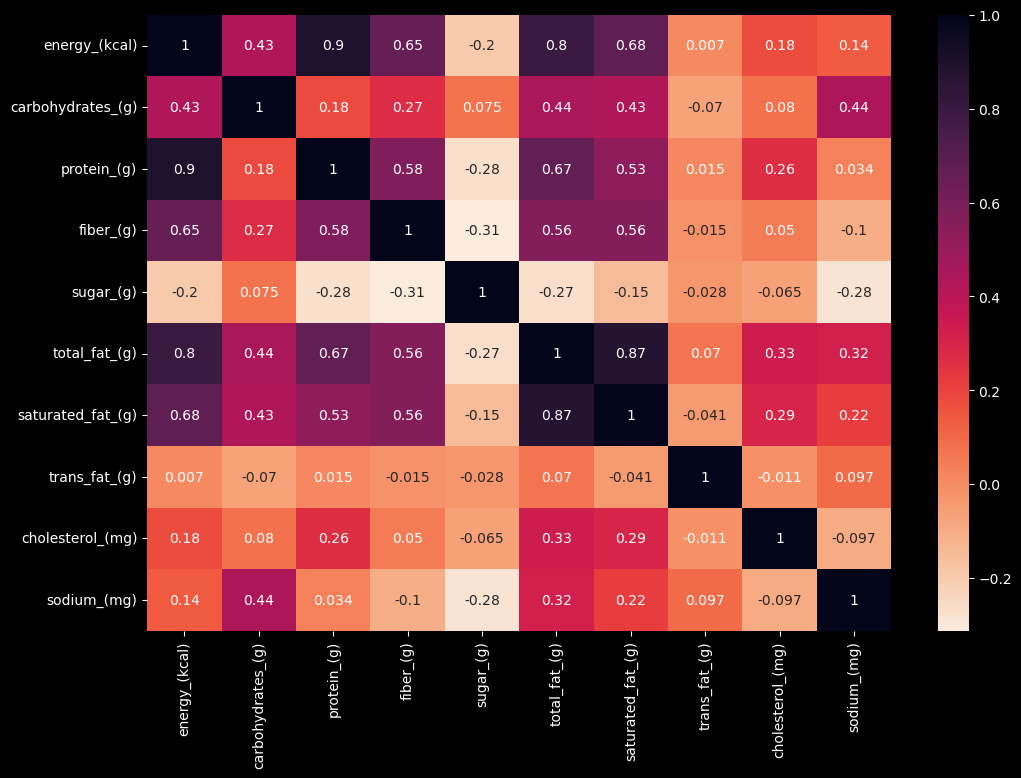

In [23]:
fig,ax=plt.subplots(figsize=(12,8))
_=sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

#### Distribution of Data by Company

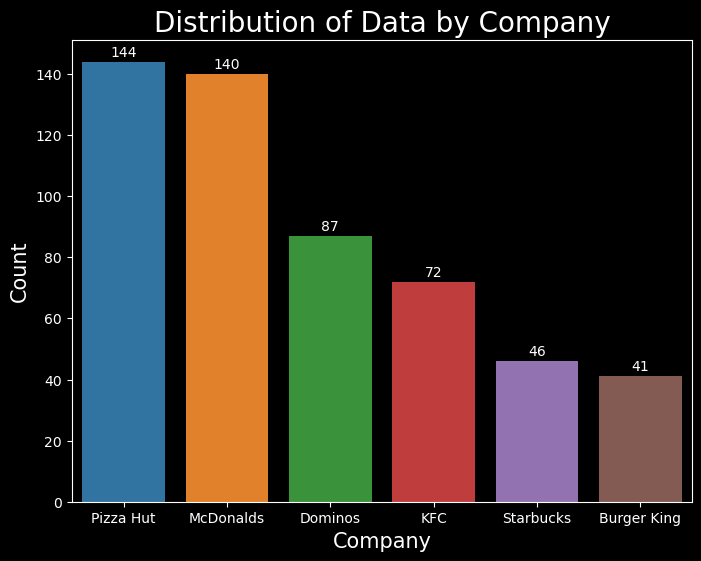

In [24]:
order=df['company'].value_counts().index
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='company', order=order, palette='tab10')
plt.title('Distribution of Data by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Distribution of Category

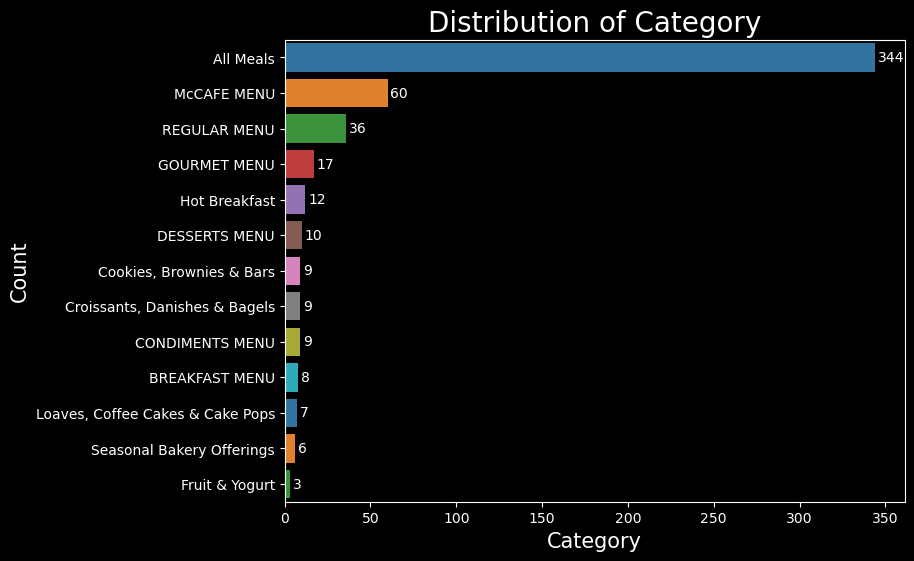

In [25]:
order=df['category'].value_counts().index
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='category', order=order, palette='tab10')
plt.title('Distribution of Category', fontsize=20)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Energy (kcal) by Company

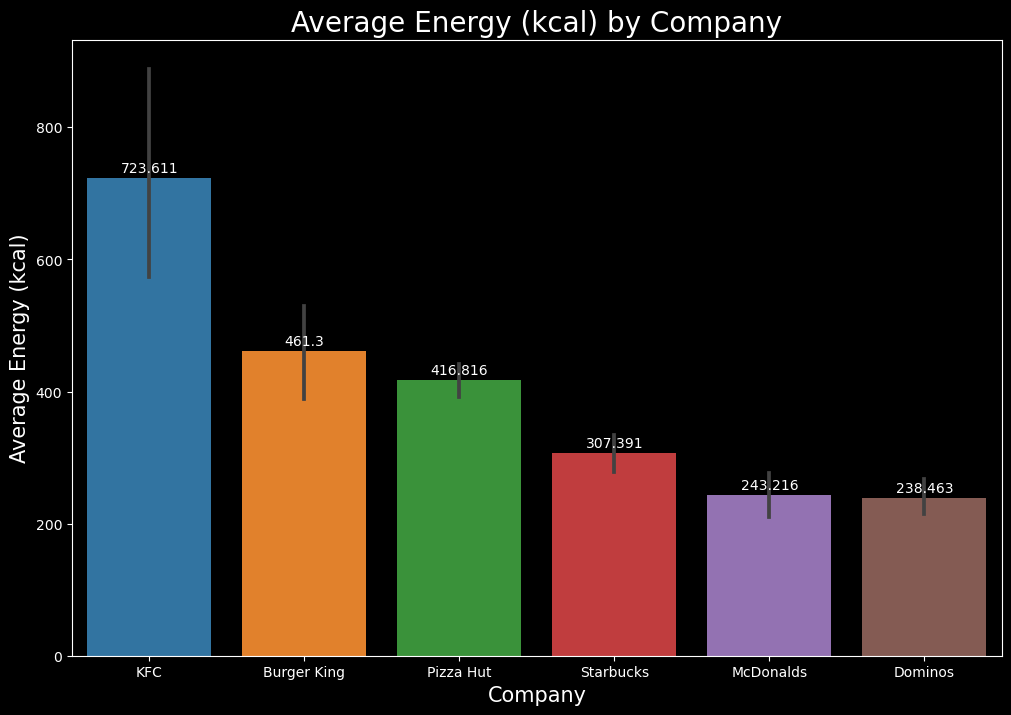

In [26]:
order=df.groupby('company')['energy_(kcal)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='energy_(kcal)',estimator='mean', order=order, palette='tab10')
plt.title('Average Energy (kcal) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Energy (kcal)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Carbohydrates (g) by Company

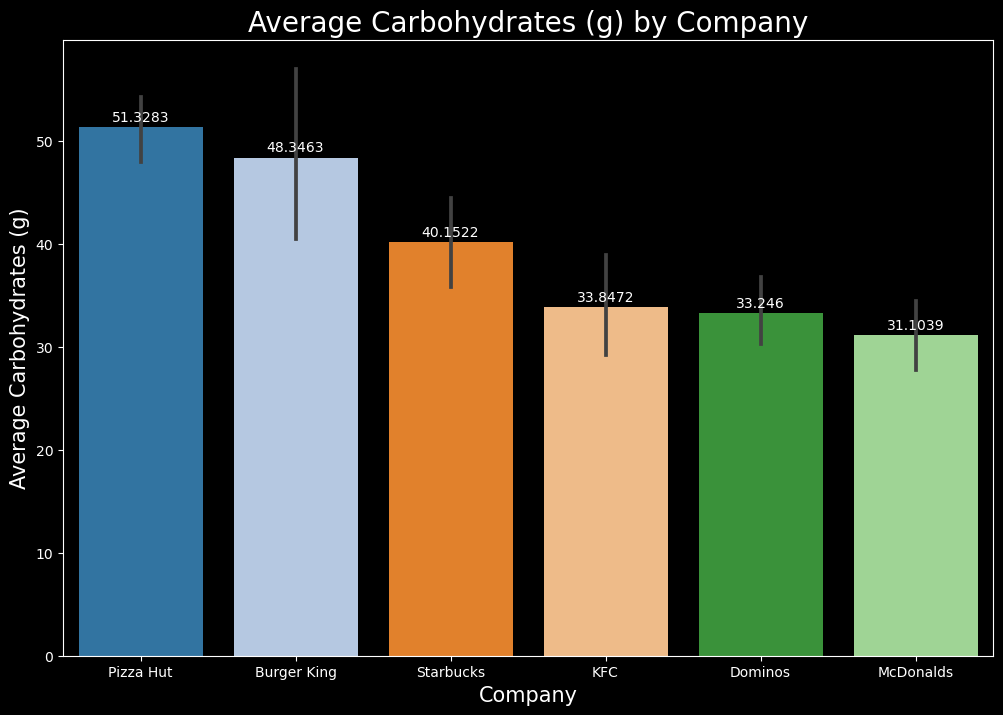

In [27]:
order=df.groupby('company')['carbohydrates_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='carbohydrates_(g)',estimator='mean', order=order, palette='tab20')
plt.title('Average Carbohydrates (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Carbohydrates (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Protein (g) by Company

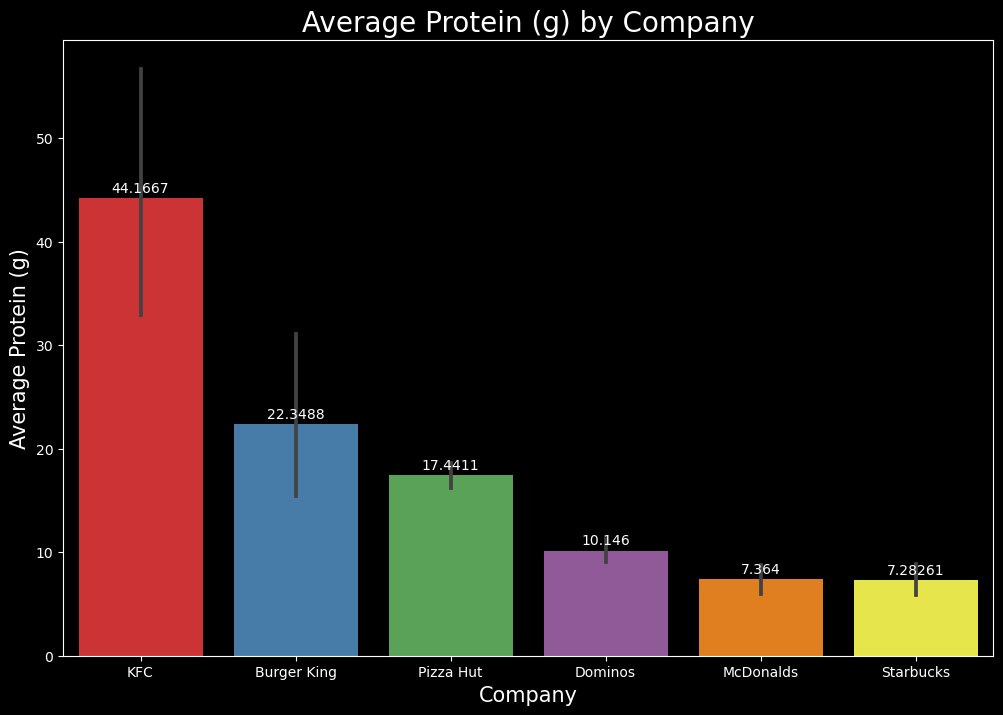

In [28]:
order=df.groupby('company')['protein_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='protein_(g)',estimator='mean', order=order, palette='Set1')
plt.title('Average Protein (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Protein (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Fiber (g) by Company

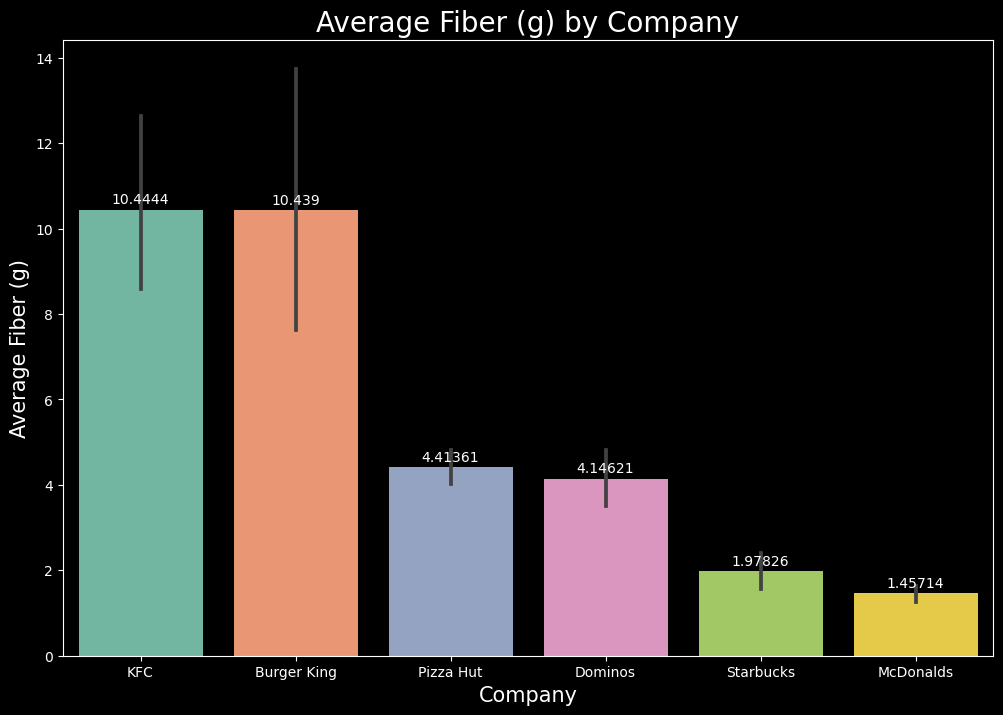

In [29]:
order=df.groupby('company')['fiber_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='fiber_(g)',estimator='mean', order=order, palette='Set2')
plt.title('Average Fiber (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Fiber (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Sugar (g) by Company

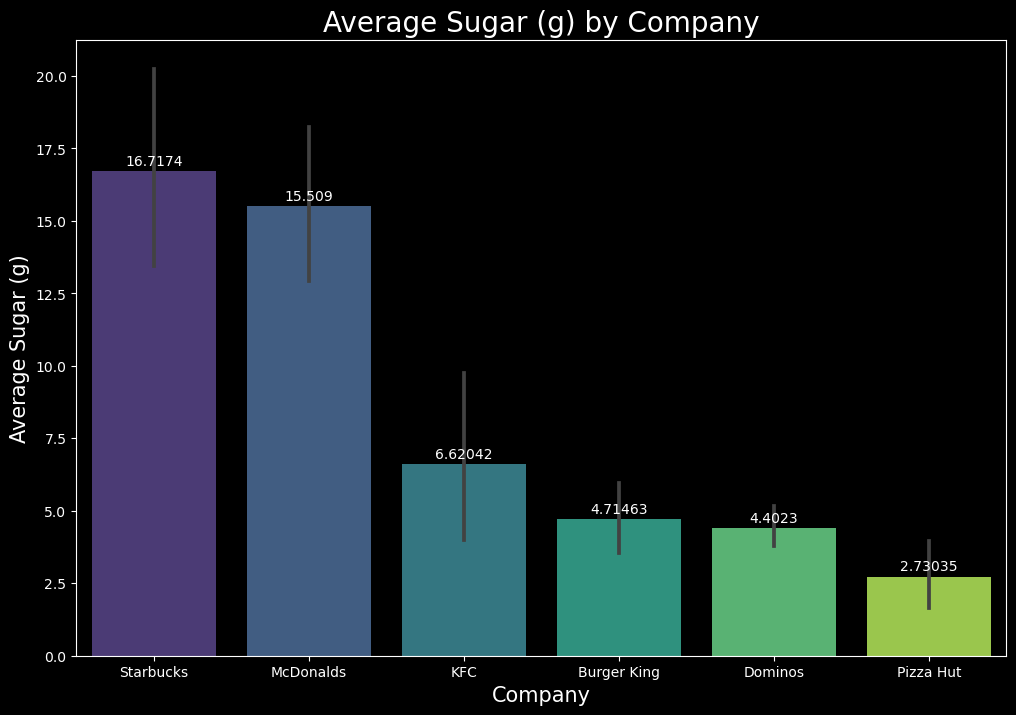

In [30]:
order=df.groupby('company')['sugar_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='sugar_(g)',estimator='mean', order=order, palette='viridis')
plt.title('Average Sugar (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Sugar (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Total fat (g) by Company

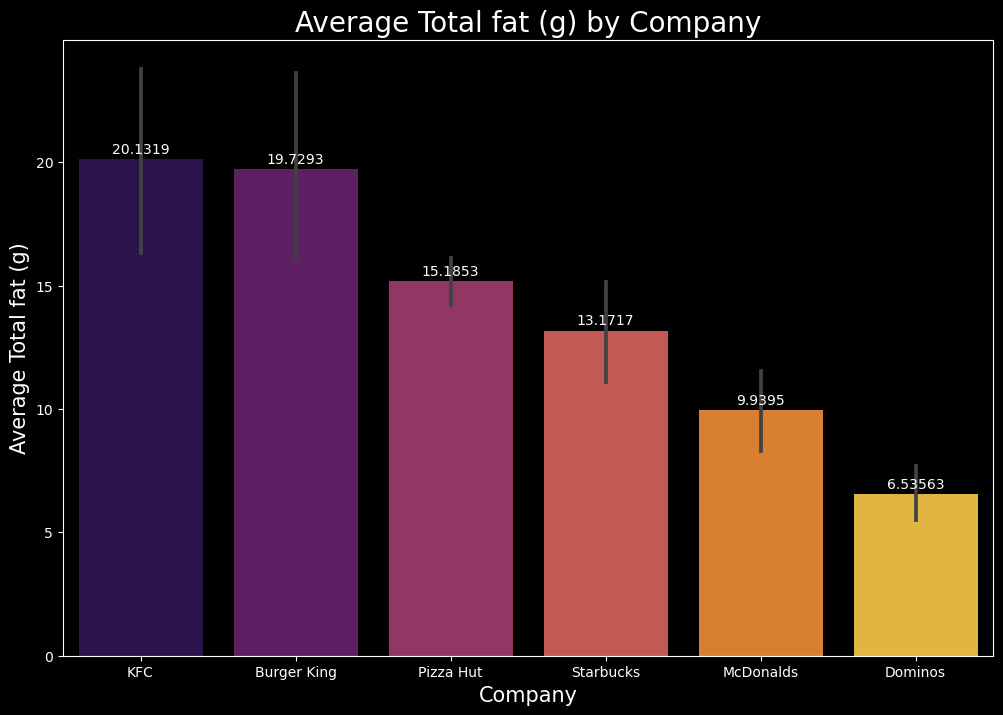

In [31]:
order=df.groupby('company')['total_fat_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='total_fat_(g)',estimator='mean', order=order, palette='inferno')
plt.title('Average Total fat (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Total fat (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Saturated fat (g) by Company

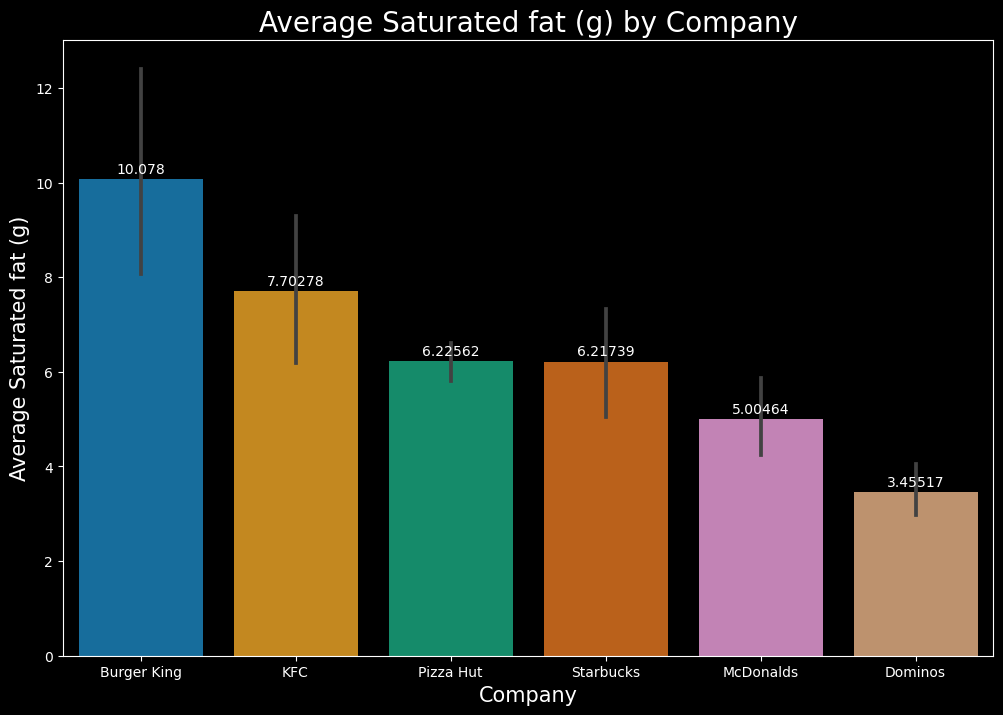

In [32]:
order=df.groupby('company')['saturated_fat_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='saturated_fat_(g)',estimator='mean', order=order, palette='colorblind')
plt.title('Average Saturated fat (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Saturated fat (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Trans fat (g) by Company

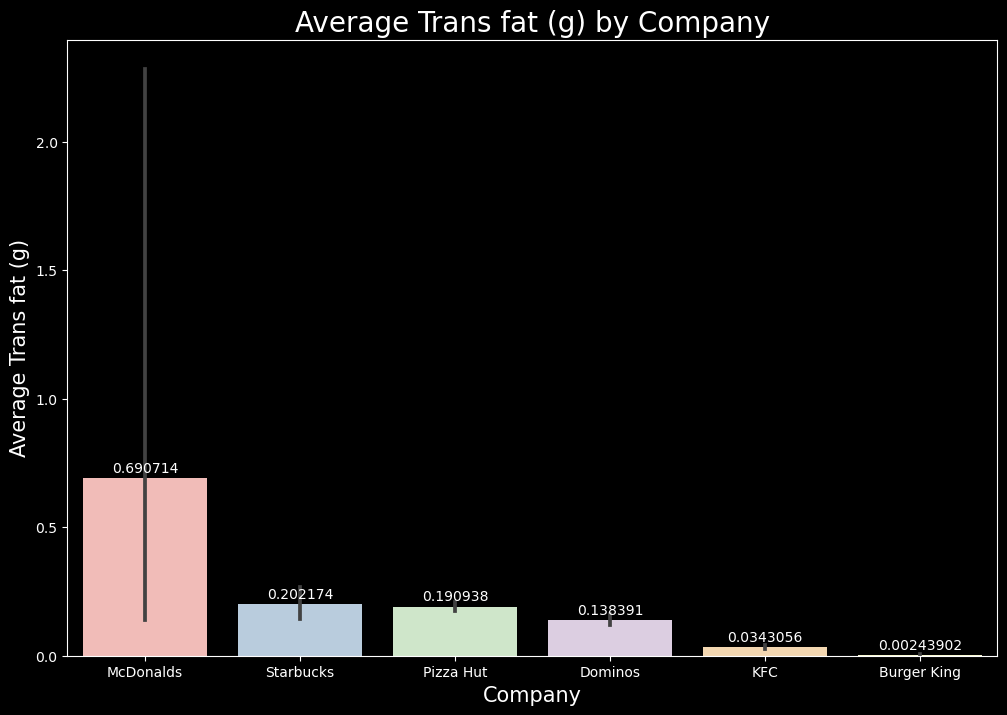

In [33]:
order=df.groupby('company')['trans_fat_(g)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='trans_fat_(g)',estimator='mean', order=order, palette='Pastel1')
plt.title('Average Trans fat (g) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Trans fat (g)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Cholesterol (mg) by Company

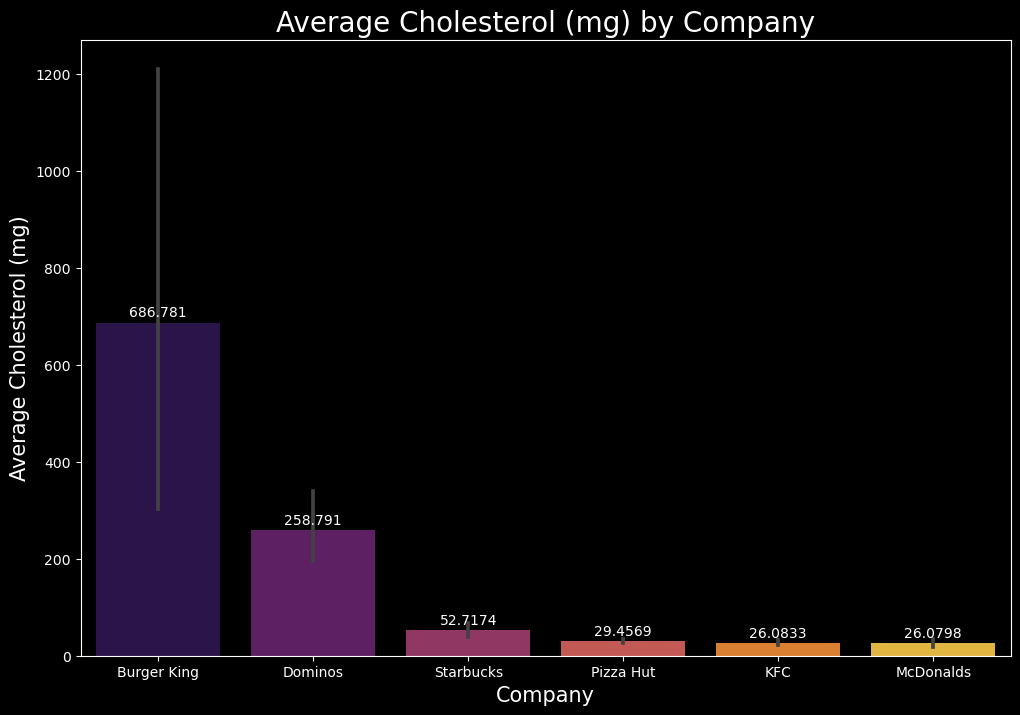

In [34]:
order=df.groupby('company')['cholesterol_(mg)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='cholesterol_(mg)',estimator='mean', order=order, palette='inferno')
plt.title('Average Cholesterol (mg) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Cholesterol (mg)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Average Sodium (mg) by Company

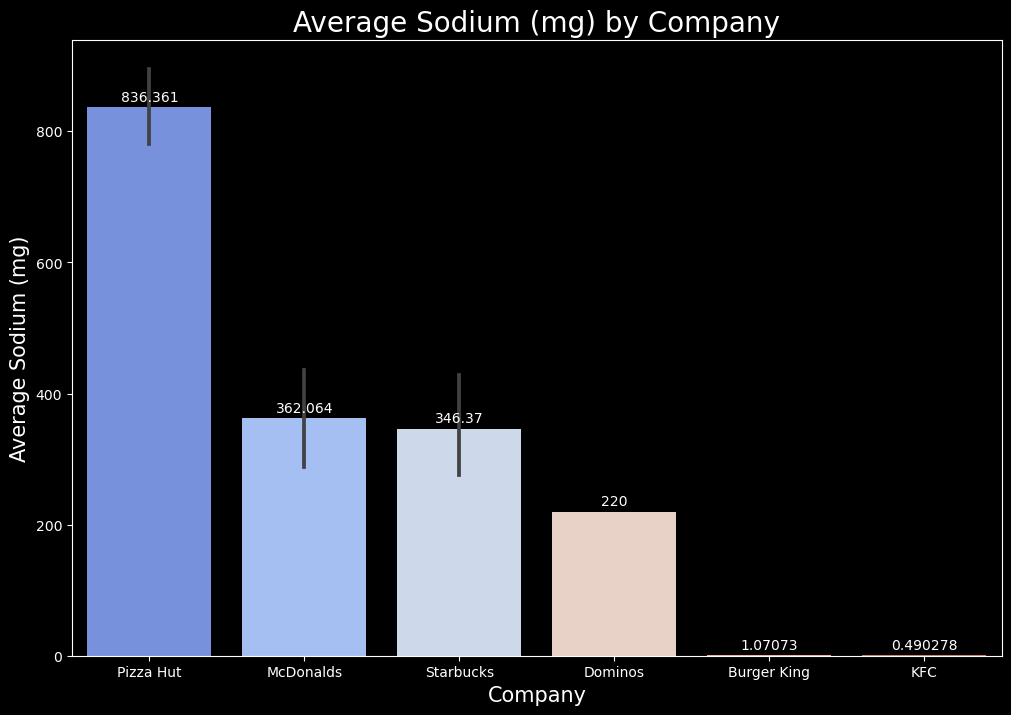

In [35]:
order=df.groupby('company')['sodium_(mg)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='company', y='sodium_(mg)',estimator='mean', order=order, palette='coolwarm')
plt.title('Average Sodium (mg) by Company', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Average Sodium (mg)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

In [36]:
def plot_nutritions(company):
    data = df[df['company'] == company]
    
    average_nutrition = data[['energy_(kcal)', 'carbohydrates_(g)', 'protein_(g)', 'fiber_(g)', 'sugar_(g)',
                                    'total_fat_(g)', 'saturated_fat_(g)', 'trans_fat_(g)', 'cholesterol_(mg)', 'sodium_(mg)']].mean()
    
    plt.figure(figsize=(16, 8))
    ax = sns.barplot(y=average_nutrition.index, x=average_nutrition.values, palette='rainbow')
    plt.title(f'Average Nutritional Values for {company}', fontsize=20)
    plt.xlabel('Nutritional Values', fontsize=15)
    plt.ylabel('Average Value', fontsize=15)

    for bars in ax.containers:
        ax.bar_label(bars, padding=2)

#### Average Nutritional Values for Pizza Hut

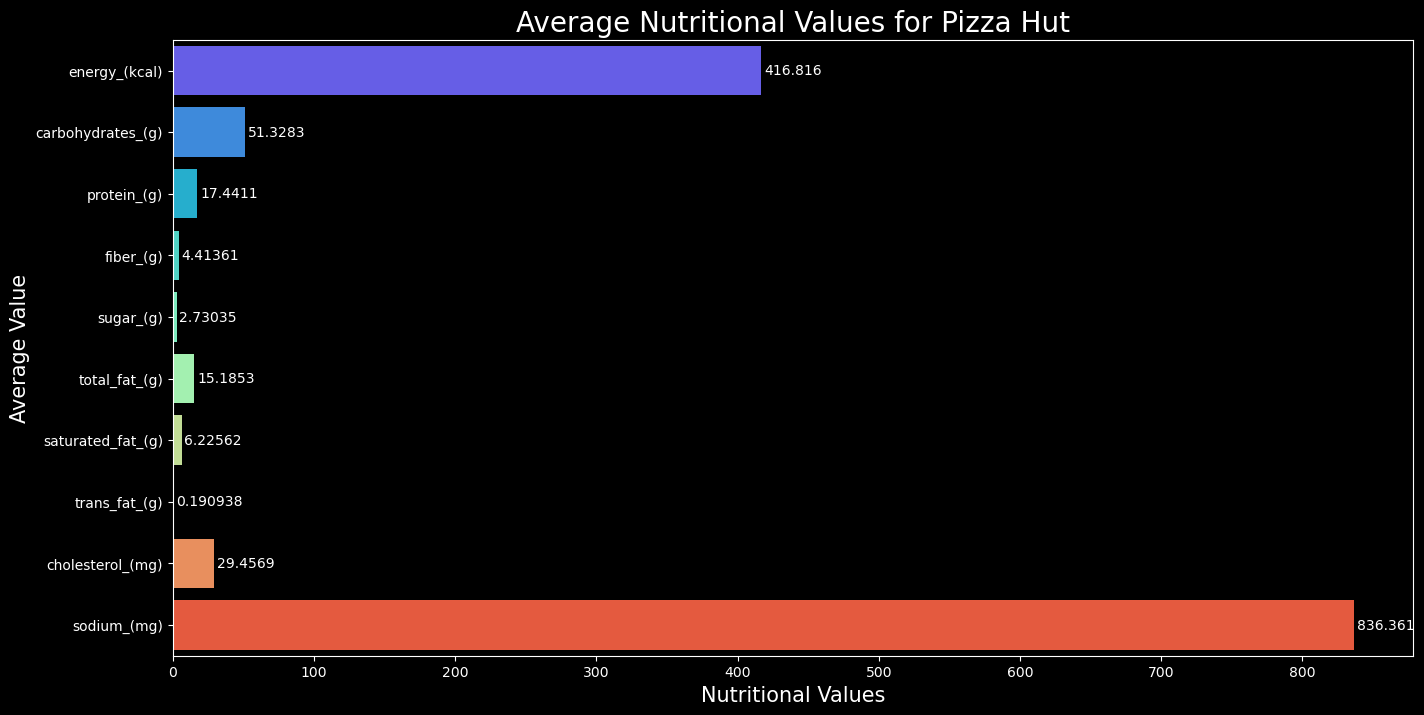

In [37]:
plot_nutritions('Pizza Hut')

#### Average Nutritional Values for Burger King

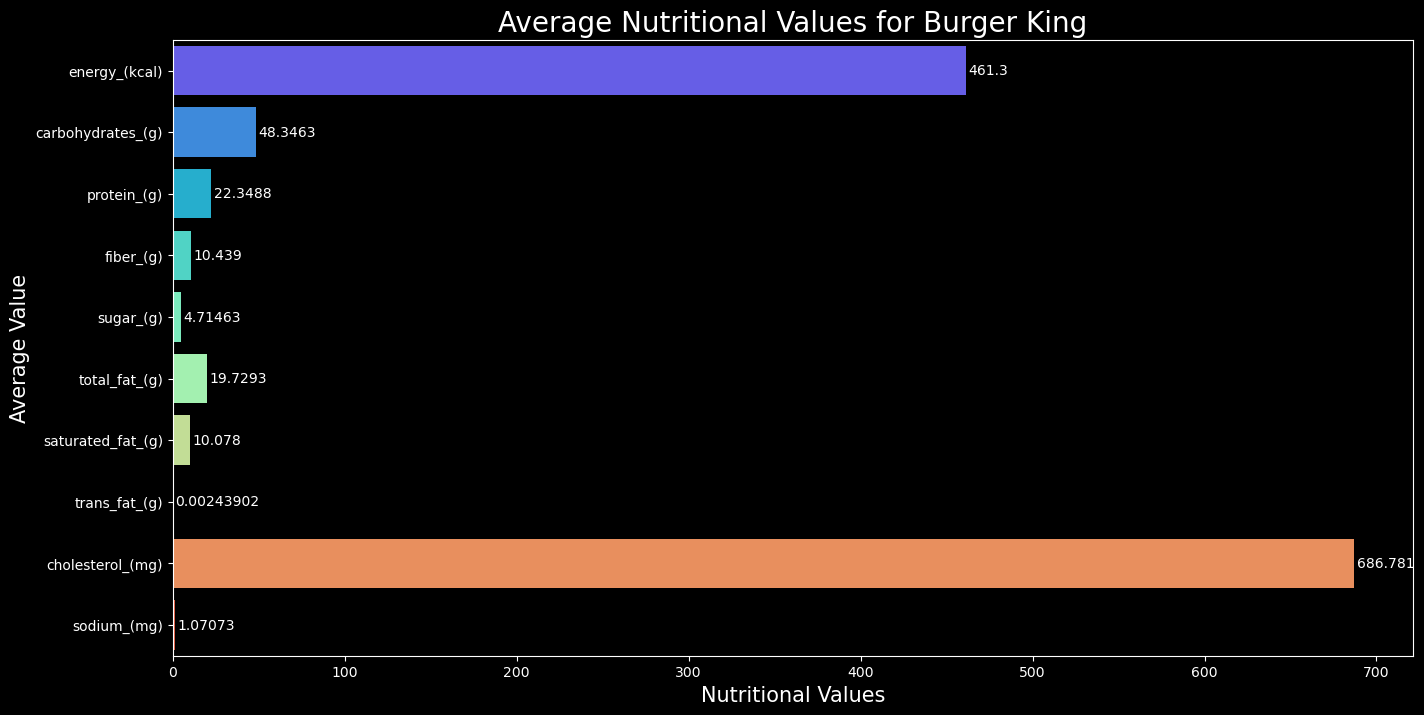

In [38]:
plot_nutritions('Burger King')

#### #### Average Nutritional Values for Starbucks

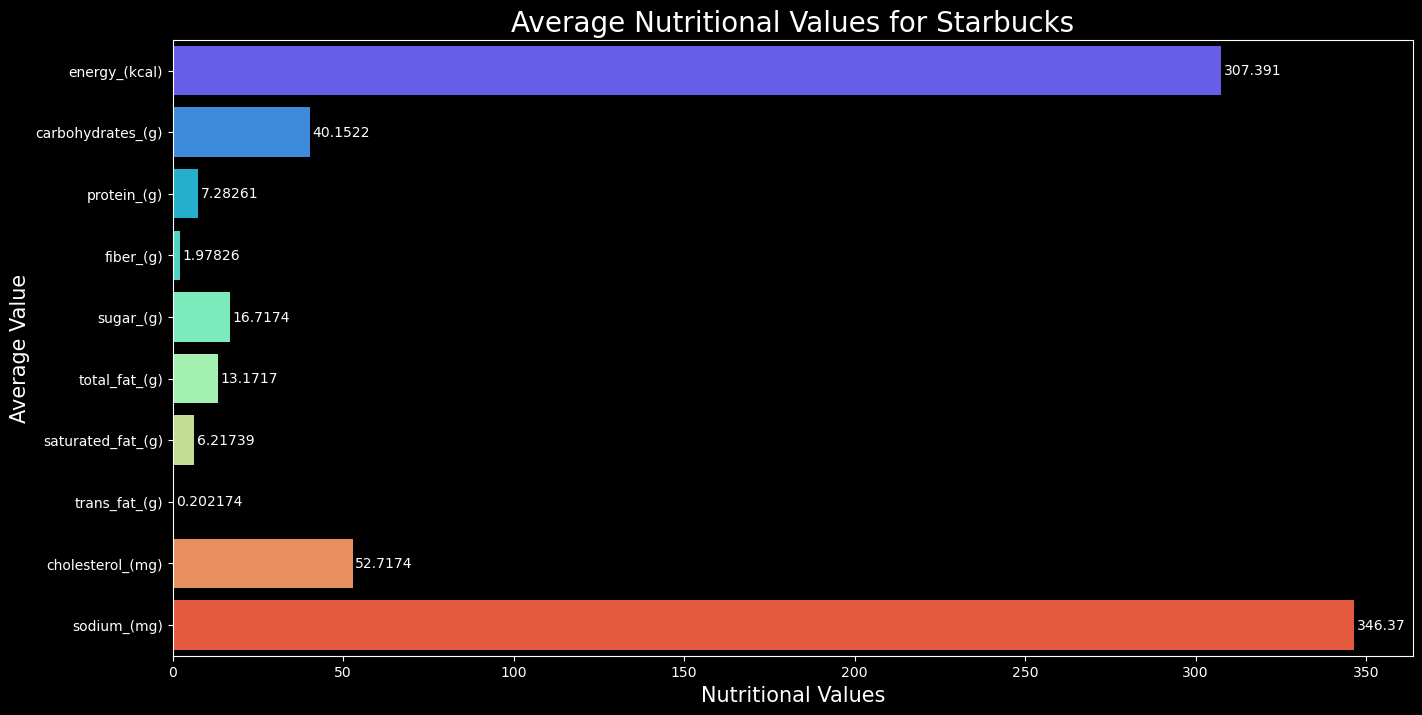

In [39]:
plot_nutritions('Starbucks')

#### Average Nutritional Values for McDonalds

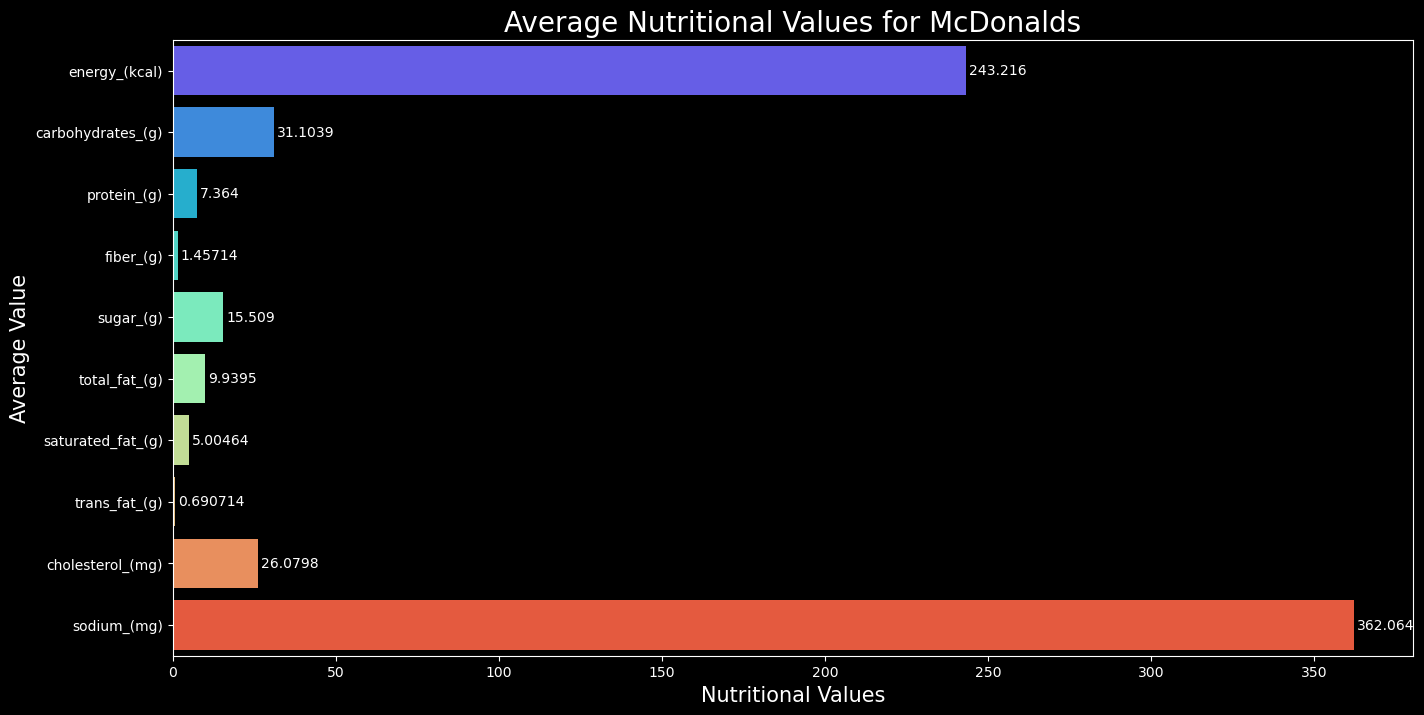

In [40]:
plot_nutritions('McDonalds')

#### Average Nutritional Values for KFC

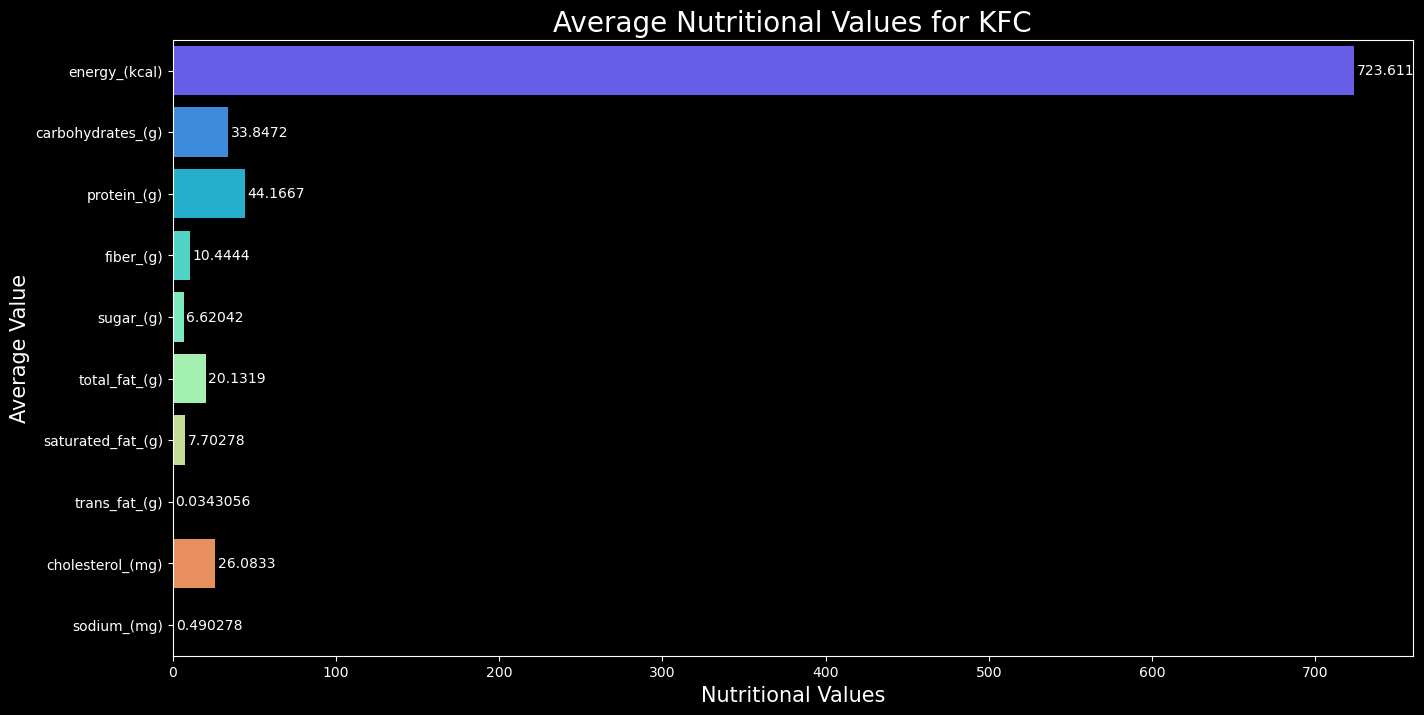

In [41]:
plot_nutritions('KFC')

#### Average Nutritional Values for Dominos

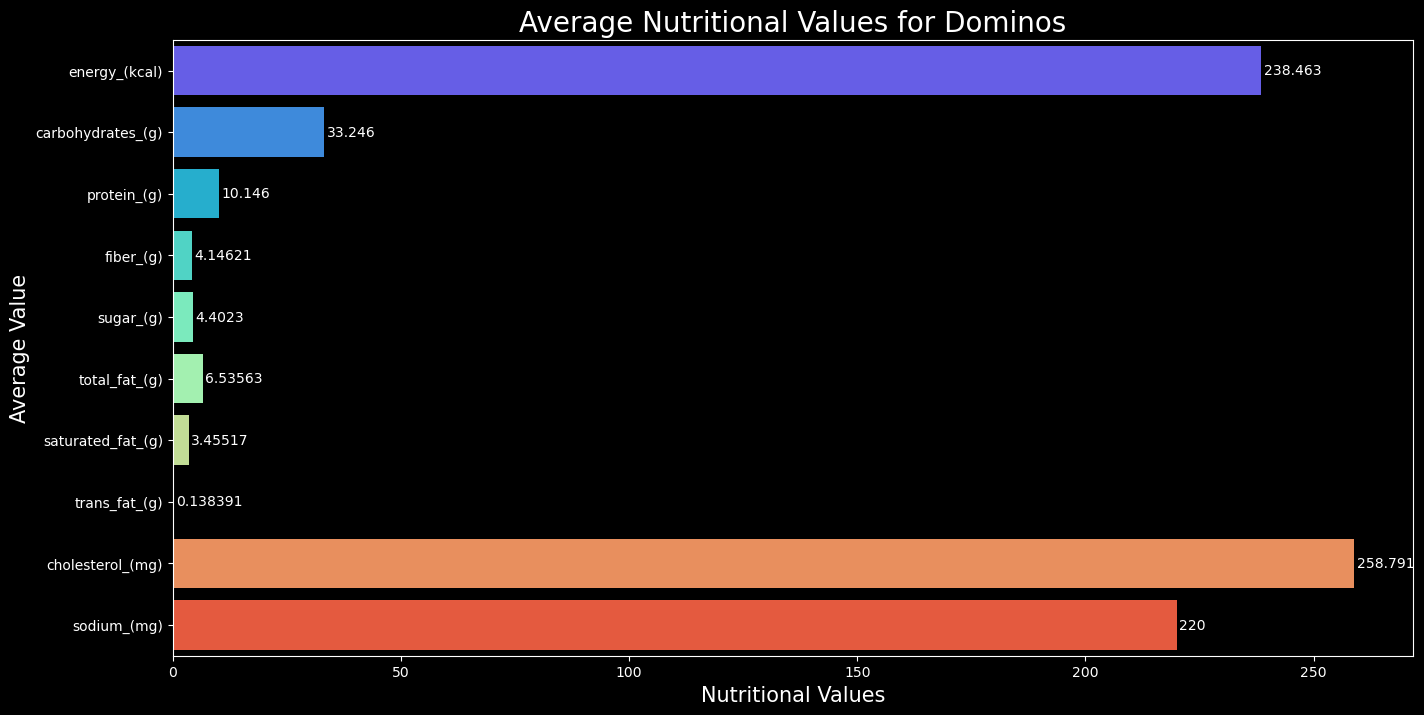

In [42]:
plot_nutritions('Dominos')

### Insights
* Pizza Hut and McDonald's Variety: It appears that both Pizza Hut and McDonald's offer a wider variety of foods in this dataset compared to other companies.
* All Meals Dominance: A significant portion of the foods in the dataset belong to the "All Meals" category, suggesting that this category is the most prevalent.
* KFC's High Energy and Protein: Foods from KFC tend to have higher levels of energy (kcal) and protein (g) compared to other companies.
* Pizza Hut's High Carbohydrates and Sodium: Foods from Pizza Hut tend to have higher levels of carbohydrates (g) and sodium (mg) compared to other companies.
* Fiber and Sugar Levels in Burger King and KGC: Burger King and KGC provide higher levels of fiber (g) in their foods, potentially indicating a focus on more nutritious options.
* Sugar Content in McDonald's and Starbucks: McDonald's and Starbucks tend to have higher sugar content (g) in their food offerings.
* Total Fat Levels in KFC and Burger King: KFC and Burger King's foods have higher levels of total fat (g) compared to others.
* Burger King's Saturated Fat and Cholesterol: Foods from Burger King tend to have higher levels of saturated fat (g) and cholesterol (mg) compared to other companies.
* McDonald's Trans Fat: Foods from McDonald's have higher levels of trans fat (g) compared to other companies.

### Conclusion
* In conclusion, this dataset provides insights into the nutritional content and variety of foods offered by different fast-food companies. Each company has its own emphasis on certain nutrients, and consumers can use this information to make more informed choices about their food consumption. It's important to consider individual dietary needs and preferences when interpreting these findings.